# Oasis Infobyte Internship Task 3

# Data Preparation

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set3')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Dataset
sales = pd.read_csv('Advertising.csv')
sales

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
# Showing first 5 rows
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Showing last 5 rows
sales.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
# Showing number of rows and columns
sales.shape

(200, 5)

In [6]:
# showing columns
sales.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Data Preprocessing and Data Cleaning

In [7]:
# checking for data types
sales.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [8]:
# Dropping Unnecessary Column
sales.drop('Unnamed: 0',axis=1,inplace=True)
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
# Checking for duplicated values
sales.duplicated().sum() # no duplicate values found

0

In [10]:
# Checking for null values
sales.isna().sum() # no null values found

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
# Checking for unique values
sales.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [12]:
# Showing information about the dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
# Showing statistical info. about numerical columns
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Data Visualization

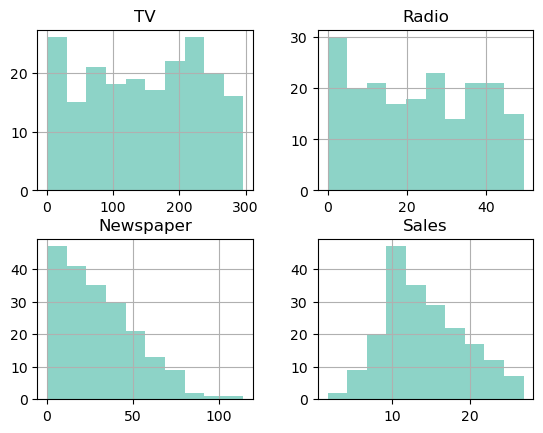

In [14]:
# Plotting HistPlot
sales.hist()
plt.show()

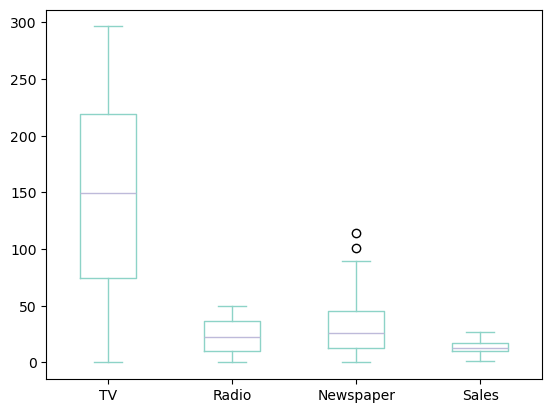

In [15]:
# Plotting box plot and checking for outliers
sales.plot(kind='box')
plt.show()
# There are no considerable outliers present in the data.

In [16]:
# Correlation between different features
sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


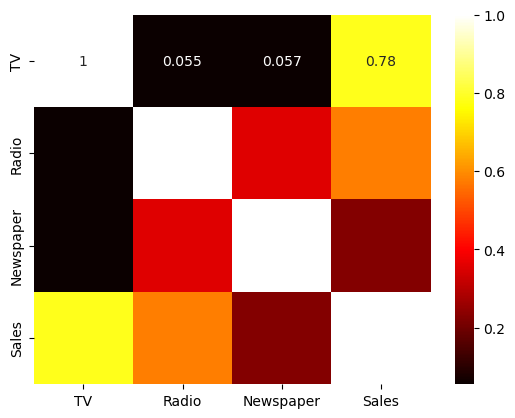

In [17]:
# Plotting Correlation Plot
sns.heatmap(sales.corr(),annot=True,cmap='hot')
plt.show()

This Plot clearly shows -

1. Sales is Highly correlated with TV
2. After Tv , Sales is correlated with Radio
3. Sales is least correlated with Newspaper.

# Target Variable (Sales)

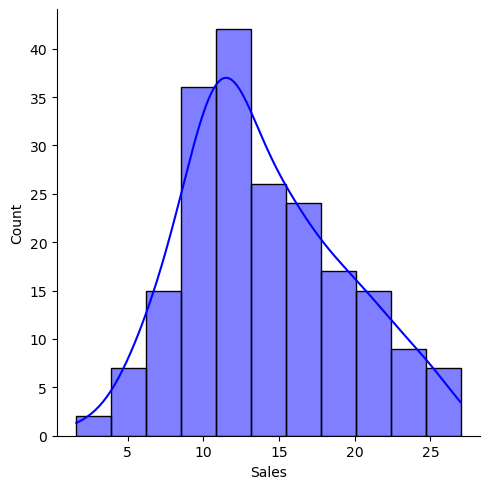

In [18]:
# Showing Frequency Distribution of Target Variable
sns.displot(sales['Sales'],kde=True,color='b')
plt.show()

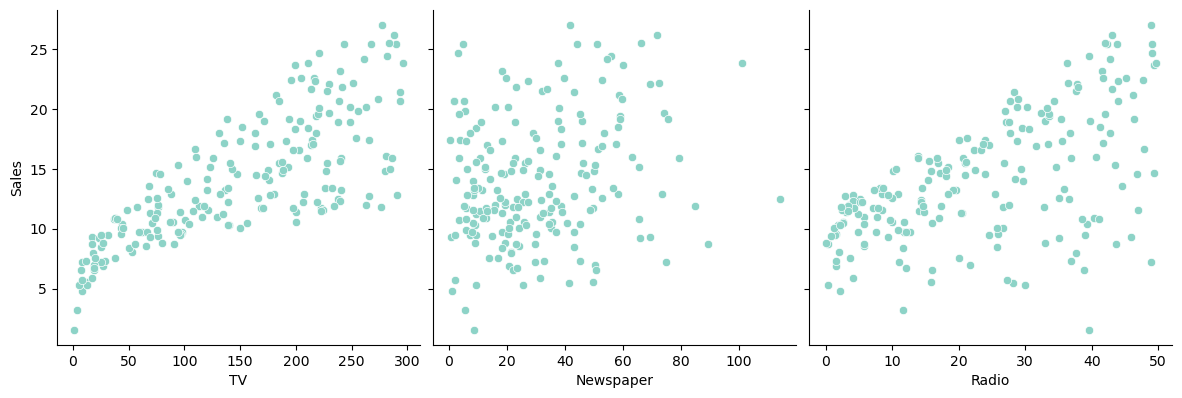

In [19]:
# Showing how Sales are related with other variables using scatter plot.
sns.pairplot(sales, x_vars = ['TV', 'Newspaper', 'Radio'], y_vars = 'Sales', height=4, aspect=1, kind='scatter')
plt.show()

# Selecting independent and the dependent features from the dataset

In [20]:
x = sales.drop('Sales',axis=1) # x denotes independent features
y = sales['Sales']             # y denotes dependent variable
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(200, 3)
(200,)


# Splitting data into training and test data

In [21]:
print(0.25*200)

50.0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(type(x_train))
print(type(y_train))

(150, 3)
(50, 3)
(150,)
(50,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Standardization of Data

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[ 0.12193673,  0.5453944 ,  1.08613993],
       [ 0.50040985,  1.62909318,  1.08613993],
       [ 1.64997774,  0.32326981,  0.61668278],
       [-1.66549396,  0.90213996,  0.71347807],
       [ 0.7939918 ,  1.7165968 , -1.31922298],
       [-0.91798007,  0.77425005,  1.0764604 ],
       [ 0.75272526,  1.37331334, -0.15767952],
       [-1.21392011, -0.80081525, -0.58357879],
       [ 0.81875173, -1.35276121, -0.84008631],
       [ 0.26106392, -0.06713099,  0.05043035],
       [-1.43204325,  0.07422103, -1.36762063],
       [-1.14081938, -1.1979471 , -0.03668541],
       [ 0.96141605, -1.35276121,  2.63002478],
       [-1.73977373,  0.43096658, -1.01915759],
       [-0.15867574, -1.44026484, -0.18671811],
       [ 0.20329076, -1.05659508,  0.22950163],
       [-1.71737189,  0.30980772,  0.52956702],
       [ 0.52634882, -0.0132826 , -0.7868489 ],
       [-0.91562198, -0.21521405,  0.09882799],
       [ 0.99560832,  0.26942143, -0.94172136],
       [ 0.90246385,  0.59251174,  2.117

# Creating functions to evaluate the Regression Evaluation Metrics, Model Score

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
def reg_eval_metrics(ytest, ypred):
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)


def mscore(model):
    print('Training Score',model.score(x_train,y_train)) # Trainng R2 score
    print('Testing Score',model.score(x_test,y_test))    # Test R2 Score


# Importing the ML Regression libraries

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


1) Linear Regression

In [28]:
# Building the Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [29]:
# Computing Training and Testing score
mscore(lin_reg)

Training Score 0.8966445527601499
Testing Score 0.8935163320163658


In [30]:
# Generating Prediction
ypred_lr = lin_reg.predict(x_test)
ypred_lr

array([16.38348211, 20.92434957, 21.61495426, 10.49069997, 22.17690456,
       13.02668085, 21.10309295,  7.31813008, 13.56732111, 15.12238649,
        8.92494113,  6.49924401, 14.30119928,  8.77233515,  9.58665483,
       12.09485291,  8.59621605, 16.25337881, 10.16948105, 18.85753401,
       19.5799036 , 13.15877029, 12.25103735, 21.35141984,  7.69607607,
        5.64686906, 20.79780073, 11.90951247,  9.06581044,  8.37295611,
       12.40815899,  9.89416076, 21.42707658, 12.14236853, 18.28776857,
       20.18114718, 13.99303029, 20.89987736, 10.9313953 ,  4.38721626,
        9.58213448, 12.6170249 ,  9.93851933,  8.06816257, 13.45497849,
        5.25769423,  9.15399537, 14.09552838,  8.71029827, 11.55102817])

In [31]:
# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_lr)

MAE: 1.4023124989385067
MSE: 2.880023730094191
RMSE: 1.6970632663793623


In [32]:
# Evaluating Model : R2 score
r2_lr = r2_score(y_test,ypred_lr)
r2_lr

0.8935163320163658

2) kNN Regression

In [33]:
# Building the knn Regressor Model
knn = KNeighborsRegressor(n_neighbors=10)  # K=15 (number of nearest neighbors)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [34]:
# Computing Training and Testing score
mscore(knn)

Training Score 0.903343320161523
Testing Score 0.9090100856949836


In [35]:
# Generating Prediction
ypred_knn = knn.predict(x_test)
ypred_knn

array([16.95, 19.92, 21.22,  7.68, 20.23, 12.6 , 20.71,  9.48, 14.22,
       15.17,  8.09,  9.89, 15.67,  6.4 , 11.56, 13.84,  6.97, 16.33,
       11.14, 17.76, 18.91, 12.46,  9.32, 21.71,  9.9 ,  9.4 , 20.21,
       12.72, 10.06,  6.76, 13.8 , 10.06, 19.82,  8.26, 16.67, 18.4 ,
       10.44, 22.32, 12.26,  6.42, 12.11, 13.57,  9.24, 10.06, 13.94,
        7.49, 11.14, 13.28, 10.84, 11.43])

In [36]:
# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_knn)

MAE: 1.1873999999999996
MSE: 2.4609699999999997
RMSE: 1.5687479083651394


In [37]:
# Evaluating Model : R2 score
r2_knn = r2_score(y_test,ypred_knn)
r2_knn

0.9090100856949836

3) Randomforest Regression

In [38]:
# Building the RandomForest Regressor Model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestRegressor()

In [39]:
# Computing Training and Testing score
mscore(rf)

Training Score 0.9962284197805615
Testing Score 0.978987515780158


In [40]:
# Generating Prediction
ypred_rf = rf.predict(x_test)
ypred_rf

array([17.563, 21.624, 20.621,  6.729, 23.025, 13.025, 22.771,  9.702,
       12.072, 15.891,  7.796,  9.163, 12.2  ,  4.758, 10.503, 12.569,
        6.566, 16.729, 11.244, 19.649, 19.982, 12.842, 10.804, 22.321,
       10.077,  9.05 , 22.423, 12.677, 10.303,  5.192, 11.441, 10.859,
       21.862,  8.284, 15.122, 20.397, 12.374, 20.68 , 12.528,  7.754,
       11.488, 12.988, 10.225,  9.809, 11.862,  9.187, 10.891, 15.468,
       10.569, 11.817])

In [41]:
# Evaluating the model : mean_absolute_error, mean_squared_error, root_mean_squared_error
reg_eval_metrics(y_test,ypred_rf)

MAE: 0.6137599999999995
MSE: 0.5683167600000011
RMSE: 0.7538678664063093


In [42]:
# Evaluating Model : R2 score
r2_rf = r2_score(y_test,ypred_rf)
r2_rf

0.978987515780158

# Creating a dataframe showing R2_score of each model

In [43]:
# Creating a dataframe showing R2_score of each model
models = pd.DataFrame({
    'Model': ['Linear Regression','Knn Regressor','RandomForest Regressor'],
    'Score': [r2_lr,r2_knn,r2_rf]})
models

,Model,Score
0,Linear Regression,0.893516
1,Knn Regressor,0.909010
2,RandomForest Regressor,0.978988


# Plotting R2_score of each model on a bar graph

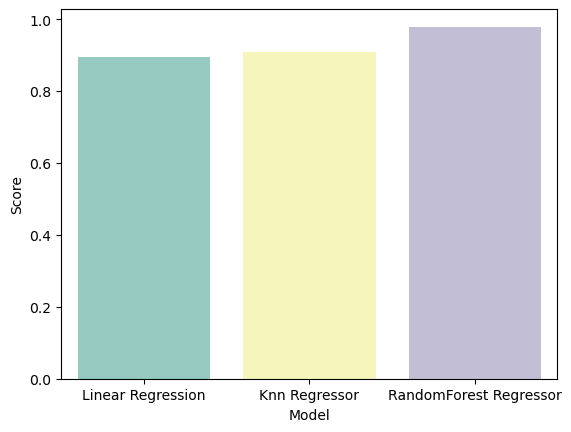

In [44]:
# plotting R2_score of each model on a bar graph
sns.barplot(x=models['Model'],y=models['Score'])
plt.show()

Hence , Randomforest Regressor model is the best model

# Sales Prediction on New dataset

In [45]:
test = np.array([[140,65,97],[76,34,87],[45,78,53],[230,95,79],[206,148,94]])
test

array([[140,  65,  97],
       [ 76,  34,  87],
       [ 45,  78,  53],
       [230,  95,  79],
       [206, 148,  94]])

In [46]:
# Creating a new dataset
new_df = pd.DataFrame(test, columns=['TV','Radio','Newspaper'])
new_df

,TV,Radio,Newspaper
0,140,65,97
1,76,34,87
2,45,78,53
3,230,95,79
4,206,148,94


In [47]:
# Generating Prediction on new Dataset
new_df_prediction = rf.predict(new_df)
new_df_prediction

array([18.847, 13.139, 12.816, 23.636, 22.474])